<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/VARMA_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install -U statsmodels

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [48]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/us_macro_quarterly.xlsx

File ‘us_macro_quarterly.xlsx’ already there; not retrieving.



In [49]:
df = pd.read_excel('us_macro_quarterly.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [50]:
df.head()

,Unnamed: 0,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
0,1957:01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1,1957:02,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
2,1957:03,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
3,1957:04,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
4,1958:01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


In [51]:
def parse_date(data):
  year,quarter = data.split(':')
  month = (int(quarter) - 1) * 3 + 1
  s = f"{year}-{month}"

  return datetime.strptime(s,"%Y-%m")

In [52]:
df['Date'] = df['Unnamed: 0'].apply(parse_date)

In [53]:
df.head()

,Unnamed: 0,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL,Date
0,1957:01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667,1957-01-01
1,1957:02,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333,1957-04-01
2,1957:03,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333,1957-07-01
3,1957:04,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000,1957-10-01
4,1958:01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667,1958-01-01


In [54]:
df.set_index(df['Date'],inplace = True)
df.drop(['Date','Unnamed: 0'],axis = 1,inplace = True)

In [55]:
df.head()

,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
Date,,,,,,,,,
1957-01-01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1957-04-01,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
1957-07-01,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
1957-10-01,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
1958-01-01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


In [56]:
df.index.freq = 'QS'

In [57]:
df.head()

,GDPC96,JAPAN_IP,PCECTPI,GS10,GS1,TB3MS,UNRATE,EXUSUK,CPIAUCSL
Date,,,,,,,,,
1957-01-01,2851.778,8.414363,16.449,3.403333,3.390000,3.096667,3.933333,NaN,27.776667
1957-04-01,2845.453,9.097347,16.553,3.626667,3.540000,3.140000,4.100000,NaN,28.013333
1957-07-01,2873.169,9.042708,16.687,3.926667,3.963333,3.353333,4.233333,NaN,28.263333
1957-10-01,2843.718,8.796834,16.773,3.633333,3.586667,3.310000,4.933333,NaN,28.400000
1958-01-01,2770.000,8.632918,16.978,3.040000,2.160000,1.756667,6.300000,NaN,28.736667


<Axes: xlabel='Date'>

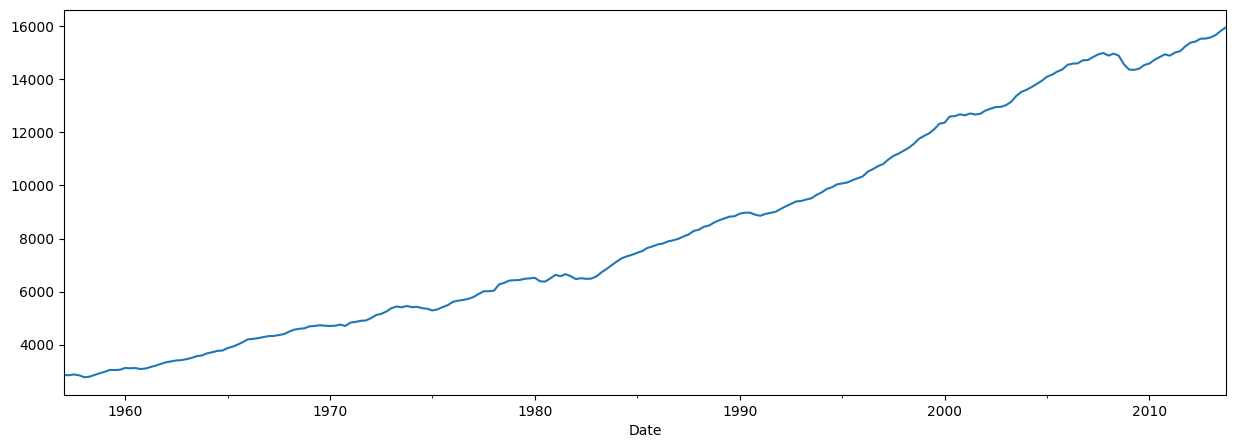

In [58]:
#GDP
df['GDPC96'].plot(figsize = (15,5))

In [59]:
#Since df['GDPC96'] is non-stationary, thus need to do differencing
df['GDPGrowth'] = np.log(df['GDPC96']).diff()

In [60]:
df['TSpread'] = df['GS10'] = df['TB3MS']

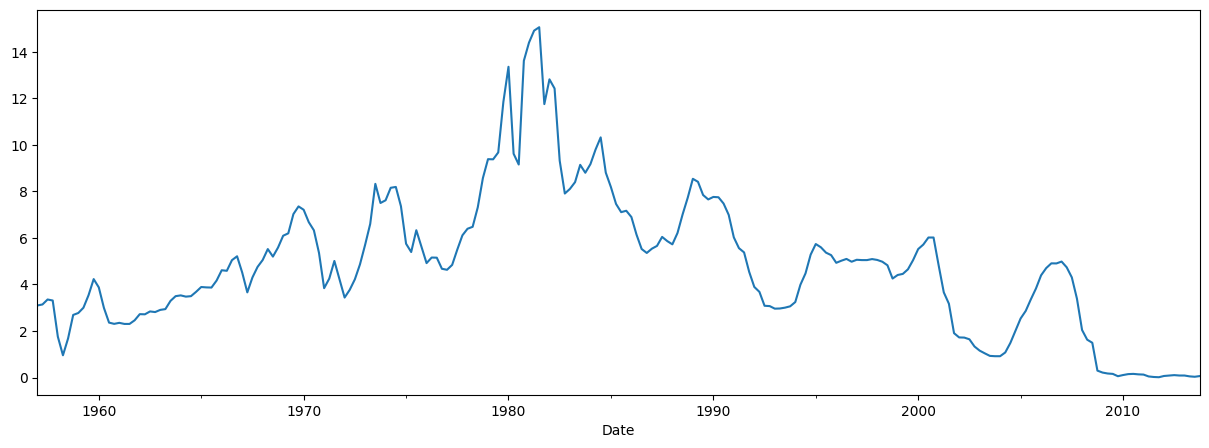

In [61]:
df['TSpread'].plot(figsize = (15,5));

In [62]:
cols = ['GDPGrowth','TSpread']

In [63]:
df1 = df.iloc[1:][cols].copy()

In [64]:
NTest = 12
train = df1.iloc[:-NTest].copy()
test  = df1.iloc[-NTest:].copy()

In [65]:
train_idx = df1.index <= train.index[-1]
test_idx  = ~train_idx
#test_idx2 = df1.index > train.index[-1]

In [66]:
#Just overwrite originals,unless you want to preserve it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[cols] = scaler.fit_transform(train)
test[cols] = scaler.transform(test)

In [67]:
df1.loc[train_idx, : ] = train
df1.loc[test_idx, :  ] = test

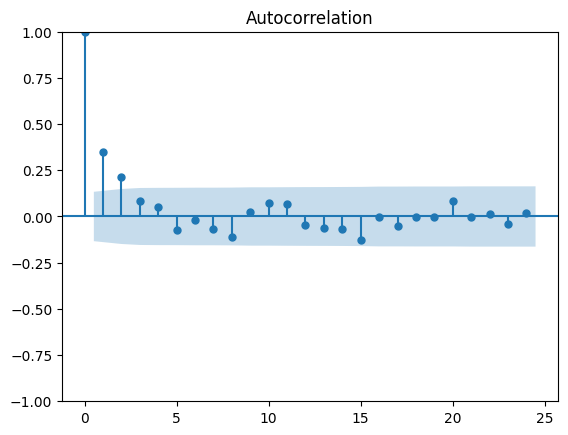

In [68]:
plot_acf(train['GDPGrowth']);

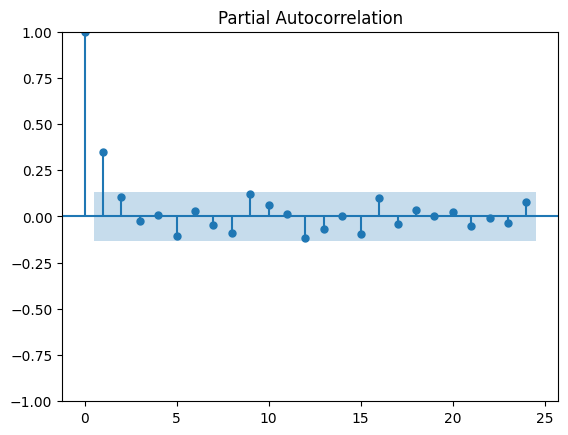

In [69]:
plot_pacf(train['GDPGrowth']);

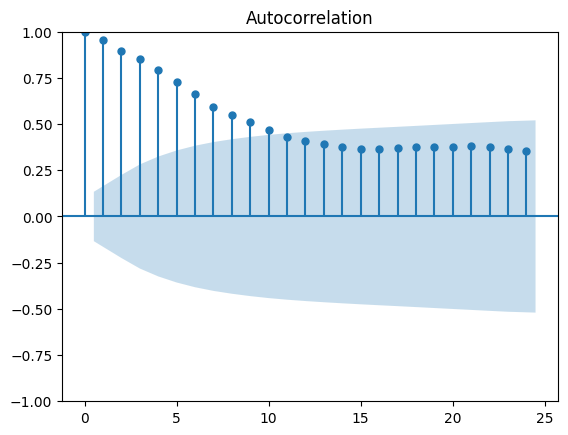

In [70]:
plot_acf(train['TSpread']);

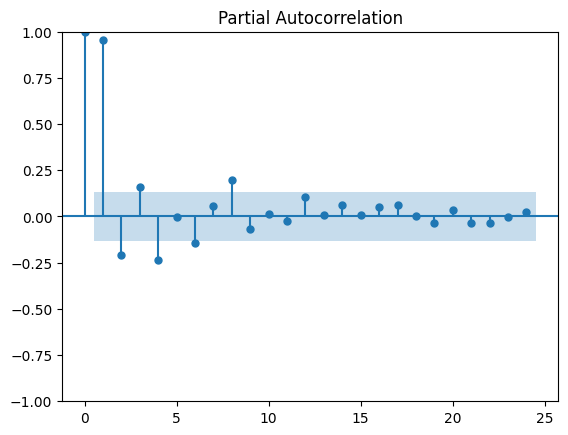

In [71]:
plot_pacf(train['TSpread']);

In [73]:
#P value is at the second col
#Since it is a very small value,
#so we assume that it is stationary
adfuller(train['GDPGrowth'])

(-7.44663965462558,
 5.814896580913866e-11,
 1,
 213,
 {'1%': -3.461429147102264,
  '5%': -2.875206950587861,
  '10%': -2.5740544497344002},
 512.854231063742)

In [74]:
adfuller(train['TSpread'])

(-1.6494300121639034,
 0.45733770729300904,
 7,
 207,
 {'1%': -3.4623415245233145,
  '5%': -2.875606128263243,
  '10%': -2.574267439846904},
 -10.244402255474483)

In [75]:
p = 18
q = 1

In [76]:
t0 = datetime.now()
model = VARMAX(train,order = (p,q))
res = model.fit(maxiter = 100)
print('Duration: ',datetime.now()-t0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Duration:  0:01:20.815579


In [77]:
fcast = res.get_forecast(NTest)

<Axes: xlabel='Date'>

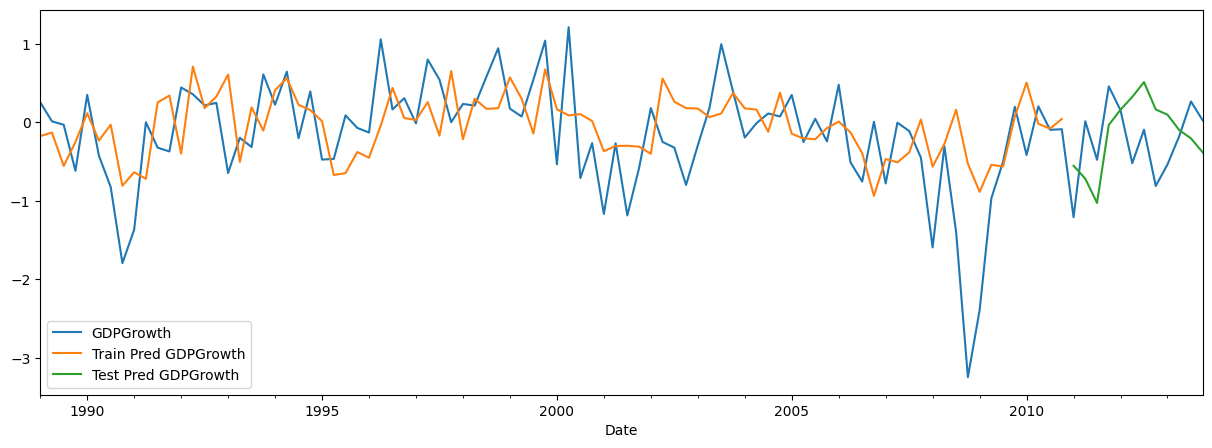

In [78]:
df1.loc[train_idx,'Train Pred GDPGrowth'] = res.fittedvalues['GDPGrowth']
df1.loc[test_idx,'Test Pred GDPGrowth'] = fcast.predicted_mean['GDPGrowth']
plot_cols = ['GDPGrowth','Train Pred GDPGrowth','Test Pred GDPGrowth']
df1.iloc[-100:][plot_cols].plot(figsize = (15,5))


<Axes: xlabel='Date'>

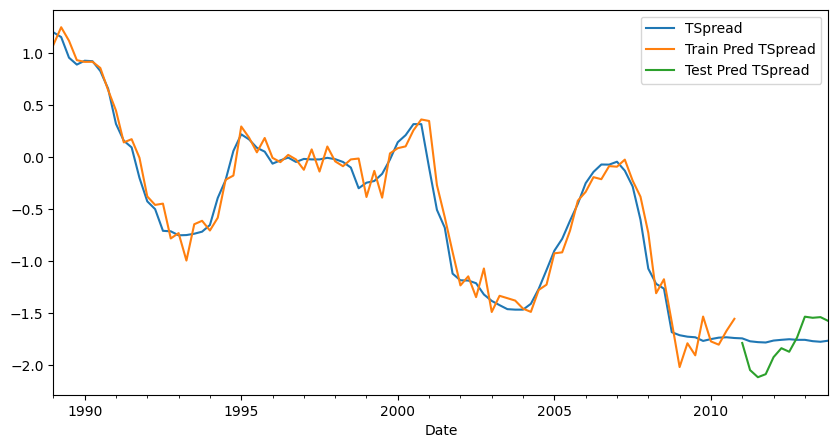

In [80]:
df1.loc[train_idx,'Train Pred TSpread'] = res.fittedvalues['TSpread']
df1.loc[test_idx,'Test Pred TSpread'] = fcast.predicted_mean['TSpread']
plot_cols = ['TSpread','Train Pred TSpread','Test Pred TSpread']
df1.iloc[-100:][plot_cols].plot(figsize = (10,5))

In [82]:
from sklearn.metrics import r2_score
for col in cols:
  y_true = df1.loc[train_idx,col]
  y_pred = res.fittedvalues[col]
  print("Train R^2: ",r2_score(y_true,y_pred))

  y_true = df1.loc[test_idx,col]
  y_pred = fcast.predicted_mean[col]
  print("Test  R^2: ",r2_score(y_true,y_pred))

Train R^2:  0.3043907339174994
Test  R^2:  -0.7038655683449755
Train R^2:  0.9637034480175324
Test  R^2:  -337.6605699733488


# **ARIMA BASELINE**

In [95]:
for col in cols:
  model = ARIMA(train[col],order = (p,0,q))
  res = model.fit()
  fcast = res.get_forecast(NTest)

  y_train = df1.loc[train_idx,col]
  y_test = df1.loc[test_idx,col]

  print(f"{col} Train R^2: ",r2_score(y_train,res.fittedvalues))
  print(f"{col} Test  R^2: ",r2_score(y_test,fcast.predicted_mean))

GDPGrowth Train R^2:  0.20569396246142635
GDPGrowth Test  R^2:  -0.848648348189061


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


TSpread Train R^2:  0.9528948174670502
TSpread Test  R^2:  -3320.109517736312
